# **Koronavirüs (Covid-19) Salgını - Türkiye'nin Durumu**

## Sayı: 34  (7 Mayıs 2021)

### Hazırlayan: Doğan Yiğit Yenigün (toUpperCase78)

**Her güne ait tüm sayısal veriler, Türkiye'de ilk vakanın görüldüğü 11 Mart 2020'den beri T. C. Sağlık Bakanlığı Covid-19 Bilgilendirme Sayfası'nda günlük olarak yayımlanan "Türkiye Günlük Koronavirüs Tablosu"ndan alınmaktadır.**

### Referans: [covid19.saglik.gov.tr](https://covid19.saglik.gov.tr/)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
covid19TR = pd.read_csv('covid_19_Turkiye_2021_05_07.csv')

In [2]:
covid19TR = covid19TR.set_index('Tarih')
covid19TR['Günlük Vaka'] = covid19TR['Günlük Vaka'].fillna(0).astype(int)
covid19TR['Toplam Vaka'] = covid19TR['Toplam Vaka'].fillna(0).astype(int)
covid19TR['Toplam Test'] = covid19TR['Toplam Test'].fillna(0).astype(int)
covid19TR['Ağır Hasta'] = covid19TR['Ağır Hasta'].fillna(0).astype(int)
covid19TR['Hasta Artış'] = covid19TR['Toplam Hasta'].diff().fillna(0).astype(int)
covid19TR['Vefat Artış'] = covid19TR['Toplam Vefat'].diff().fillna(0).astype(int)
covid19TR['İyileşen Artış'] = covid19TR['Toplam İyileşen'].diff().fillna(0).astype(int)
covid19TR['Test Artış'] = covid19TR['Toplam Test'].diff().fillna(0).astype(int)
covid19TR['Hasta +/-'] = covid19TR['Hasta Artış'].diff().fillna(0.).astype(int)
covid19TR['Vefat +/-'] = covid19TR['Vefat Artış'].diff().fillna(0).astype(int)
covid19TR['İyileşen +/-'] = covid19TR['İyileşen Artış'].diff().fillna(0).astype(int)
covid19TR['Vaka +/-'] = covid19TR['Günlük Vaka'].diff().fillna(0).astype(int)
covid19TR['Test +/-'] = covid19TR['Test Artış'].diff().fillna(0).astype(int)

In [3]:
ind = 274
while covid19TR.iloc[ind,8] != 0:
    covid19TR.iloc[ind-1,9] = covid19TR.iloc[ind,9] - covid19TR.iloc[ind,8]
    ind -= 1

### **Son 20 Güne Dair Sayısal Bilgiler**

In [4]:
covid19TR[['Toplam Test', 'Toplam Vaka', 'Toplam Hasta', 'Toplam Vefat',
           'Toplam İyileşen', 'Zatürre Oranı(%)', 'Ağır Hasta', 'Günlük Vaka']].tail(20)

,Toplam Test,Toplam Vaka,Toplam Hasta,Toplam Vefat,Toplam İyileşen,Zatürre Oranı(%),Ağır Hasta,Günlük Vaka
Tarih,,,,,,,,
2021-04-18,43768759,4268447,763278,35926,3687590,3.3,3275,55802
2021-04-19,44087628,4323596,766140,36267,3736537,2.9,3319,55149
2021-04-20,44409756,4384624,769035,36613,3792129,2.9,3375,61028
2021-04-21,44728595,4446591,771967,36975,3844342,2.9,3398,61967
2021-04-22,45050704,4501382,775095,37329,3909935,2.9,3463,54791
2021-04-23,45342795,4550820,778184,37672,3970111,2.9,3475,49438
2021-04-24,45623978,4591416,781089,38011,4022408,2.9,3511,40596
2021-04-25,45884258,4629969,783890,38358,4073644,2.9,3590,38553
2021-04-26,46153151,4667281,786606,38711,4121671,2.4,3563,37312


**NOT 1:** 29 Temmuz 2020'den itibaren _Toplam Yoğun Bakım Sayısı_ ve _Toplam Entübe Hasta Sayısı_ yerine _Hastalarda Zatürre Oranı_ ve _Ağır Hasta Sayısı_ paylaşılmaya başlanmıştır. Buradaki _Ağır Hasta Sayısı,_ oksijen saturasyonu belli oranın altında veya yoğun bakım gerektiren hastalar için uluslararası tanımlamaya uygun olarak belirlenmektedir.

**NOT 2:** 25 Kasım 2020'den itibaren hasta sayısı üzerine semptomsuz olduğu halde PCR testi pozitif çıkanların da dahil edildiği _Günlük Vaka_ sayısı paylaşılmaya başlanmıştır.

**NOT 3:** Bu tablodaki _Toplam Hasta Sayısı,_ 10 Aralık 2020'den sonra Covid-19 Bilgilendirme Sayfası Günlük Tablosu'nda görünmemesine rağmen halen görünür olan _Günlük Hasta Sayısı_ sonraki günlerin üzerine eklenerek hesaplanmaktadır.

**NOT 4:** 10 Aralık 2020'den itibaren paylaşılan _Toplam Vaka_ sayısı, PCR testi pozitif çıkan tüm kişilerin toplamını göstermektedir.

**NOT 5:** 10 Aralık 2020'den önceki _Toplam Vaka Sayısı,_ mevcut gündeki toplam vaka sayısının günlük vaka sayısı ile farkı alınarak hesaplanmıştır (Günlük Vaka sayısının ilk açıklandığı 25 Kasım 2020'ye doğru geriye dönük gidilerek; yani elde edilen veri 24 Kasım 2020'ye kadardır).

**NOT 6:** _Toplam İyileşen_ sayısı, 12 Aralık 2020'den itibaren iyileşen hastalara ilaveten izolasyon süresi dolan vakaları da dahil etmektedir.

### **Covid-19 - Türkiye'nin Durumu**

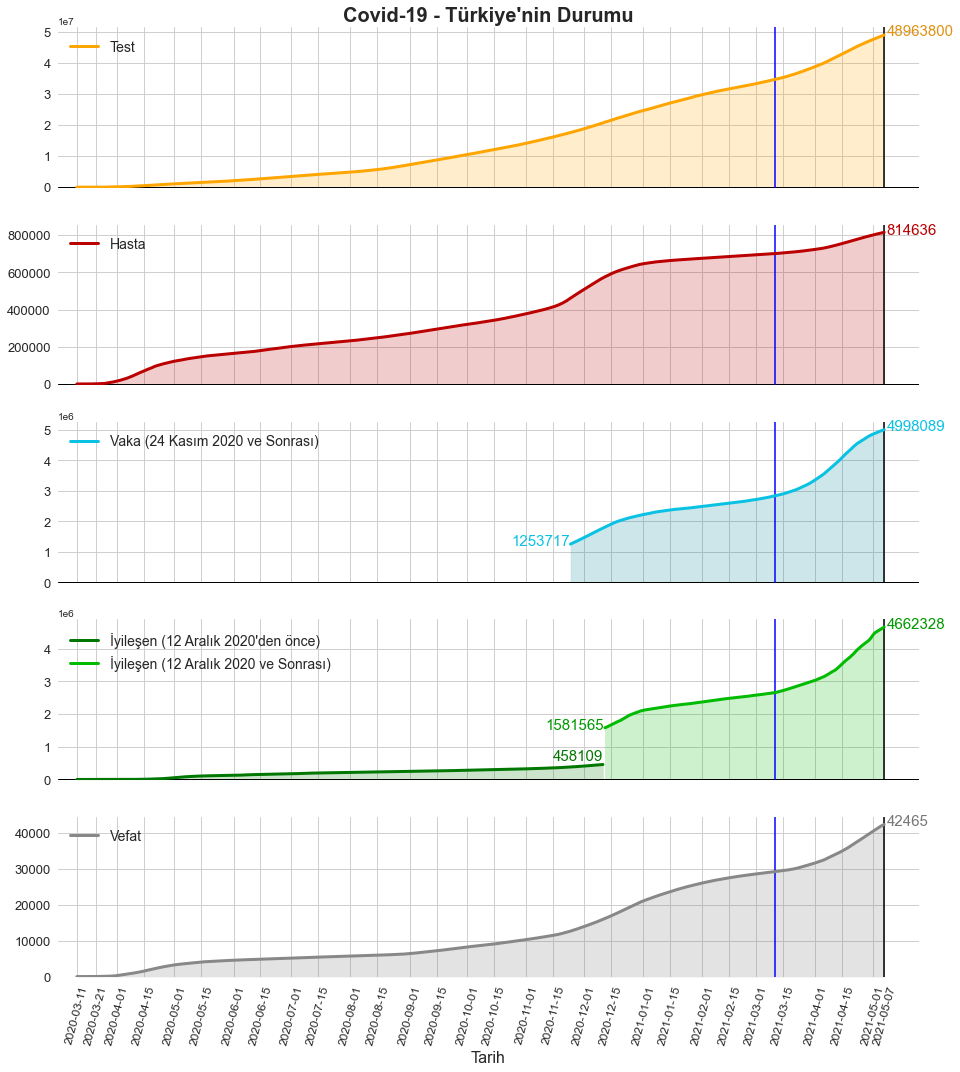

In [5]:
plt.style.use('seaborn')
plt.figure(figsize=(13.5,15), facecolor='white')
plt.rcParams['axes.facecolor'] = '#ffffff'
plt.rcParams['axes.edgecolor'] = '#eeeeee'
toplam_test = covid19TR['Toplam Test']
toplam_hasta = covid19TR['Toplam Hasta']
toplam_vaka = covid19TR['Toplam Vaka'][258:]
toplam_iyilesen_12ara2020_once = covid19TR['Toplam İyileşen'][:276]
toplam_iyilesen_12ara2020_sonra = covid19TR['Toplam İyileşen'][276:]
toplam_vefat = covid19TR['Toplam Vefat']
toplam_gun = len(covid19TR)
gunler = [0, 10, 21, 35, 51, 65, 82, 96, 112, 126, 143, 157, 174, 188, 204, 218, 235, 249, 265, 279, 296, 310, 327, 341,
          355, 369, 386, 400, 416, len(covid19TR)-1]
def plot_olustur(veri, y_min):
    plt.axis([-10, len(covid19TR)+17, y_min, max(veri)*1.05])
    plt.axhline(0, color='k', linewidth=1)
    plt.axvline(len(covid19TR)-1, color='k', linewidth=1.5)
    plt.axvline(365, color='b', linewidth=1.5)
    plt.yticks(fontsize=13)
    plt.grid(color='#cfcfcf')  
def veri_cizdir(veri, plot_renk, alt_renk, etiket, baslangic = 0, bitis = toplam_gun):
    plt.plot(range(baslangic, bitis), veri, linewidth=3, color=plot_renk, label=etiket)
    plt.fill_between(range(baslangic, bitis), veri, color=alt_renk, alpha=0.2)
    plt.legend(loc='upper left', fontsize=14)
def sayi_yazdir(x_pos, y_pos, sayi, renk):
    plt.text(x_pos, y_pos, sayi, color=renk, fontsize=15)
plt.subplot(5, 1, 1)
plot_olustur(toplam_test, -250000)
veri_cizdir(toplam_test, 'orange', 'orange', 'Test')
sayi_yazdir(toplam_gun+0.25, toplam_test[-1]-20000, toplam_test[-1], '#e09112')
plt.title('Covid-19 - Türkiye\'nin Durumu', fontsize=20, fontweight='bold')
plt.xticks(gunler, [' ' for _ in range(len(gunler))])
plt.subplot(5, 1, 2)
plot_olustur(toplam_hasta, -7000)
veri_cizdir(toplam_hasta, '#bb0000', '#bb0000', 'Hasta')
sayi_yazdir(toplam_gun+0.25, toplam_hasta[-1]-8000, toplam_hasta[-1], '#bb0000')
plt.xticks(gunler, [' ' for _ in range(len(gunler))])
plt.subplot(5, 1, 3)
plot_olustur(toplam_vaka, -7000)
veri_cizdir(toplam_vaka, '#09c2e3', '#068399', 'Vaka (24 Kasım 2020 ve Sonrası)', 258)
sayi_yazdir(toplam_gun+0.25, toplam_vaka[-1]-8000, toplam_vaka[-1], '#09c2e3')
sayi_yazdir(227, toplam_vaka[0]-50000, toplam_vaka[0], '#09c2e3')
plt.xticks(gunler, [' ' for _ in range(len(gunler))])
plt.subplot(5, 1, 4)
plot_olustur(toplam_iyilesen_12ara2020_sonra, -15000)
veri_cizdir(toplam_iyilesen_12ara2020_once, '#007700', '#007700', 'İyileşen (12 Aralık 2020\'den önce)', 0, 276)
veri_cizdir(toplam_iyilesen_12ara2020_sonra, '#00bb00', '#00bb00', 'İyileşen (12 Aralık 2020 ve Sonrası)', 276)
sayi_yazdir(249, toplam_iyilesen_12ara2020_once[-1]+125000, toplam_iyilesen_12ara2020_once[-1], '#007700')
sayi_yazdir(toplam_gun+0.25, toplam_iyilesen_12ara2020_sonra[-1]-50000, toplam_iyilesen_12ara2020_sonra[-1], '#009900')
sayi_yazdir(245, toplam_iyilesen_12ara2020_sonra[0]-45000, toplam_iyilesen_12ara2020_sonra[0], '#009900')
plt.xticks(gunler, [' ' for _ in range(len(gunler))])
plt.subplot(5, 1, 5)
plot_olustur(toplam_vefat, -200)
veri_cizdir(toplam_vefat, '#888888', '#777777', 'Vefat')
sayi_yazdir(toplam_gun+0.25, toplam_vefat[-1]-300, toplam_vefat[-1], '#777777')
plt.xlabel('Tarih', fontsize=16)
plt.xticks(gunler, covid19TR.index[gunler], fontsize=12, rotation=75)
plt.tight_layout()
plt.show()

_Yukarıdaki grafiklerde bulunan koyu mavi çizgiler, 11 Mart 2021 tarihini yani ilk vakanın üzerinden geçen bir yılı işaret etmektedir._

**Türkiye'nin bir yıldır sürdürdüğü Koronavirüs ile mücadelesinde yukarıdaki grafiklere bakıldığında;**

Toplam test sayısının zaman ilerledikçe eğimin **yükselerek** devam ettiği ve bu yükselişin **Mart 2021**'in ikinci yarısından sonra **daha da** artmasıyla **50 milyona doğru yaklaştığı** söylenebilir.

Hasta artışlarının yüksek olduğu zaman aralığı **Nisan 2020'nin başları ile sonları arasında**, takip eden aylarda ise neredeyse sabit bir şekilde artmıştır. **Kasım 2020'nin ikinci yarısından sonra** yeniden hasta artış hızı yükselmiş ve sonrasında **gitgide yatay seyir şeklinde** yavaşlayarak **Mart 2021'in ikinci yarısına kadar** neredeyse sabit şekilde ilerlemiştir. Ancak bundan sonrasında ise **yeniden artışın** yaşandığı belirtilebilir. (Toplam hasta sayısının nasıl edildiği hakkında bilgi için yukarıdaki **NOT 3**'e bakınız)

Vaka sayıları (**NOT 5**'e bakınız) **Aralık 2020'nin ikinci yarısına** kadar sabit bir şekilde artmış, sonrasında **giderek yavaşlamış** olduğu ama **Mart 2021'in ikinci yarısından sonra** eğimin yeniden büyük ölçüde yükseldiği ama **son günlerde** giderek yavaşladığı görülmektedir.

İyileşen hızı, **Nisan 2020'nin sonları ile Mayıs 2020'nin ikinci yarısına** kadarki günlerde yüksek düzeyde seyretmiştir. 12 Aralık 2020 tarihine kadar bu sayı **500 bin**'e yaklaşmıştır. Bu tarihten sonra **izolasyon süresi dolan vakalar**ın da dahil edilmesiyle (yukarıdaki **NOT 6**'ya bakınız) sayıda bir anda sıçrama yaşanmıştır (1 milyonun üzerinde) ve grafiğe göre **2020'nin sonlarına doğru sabit** şekilde yükselmiş, sonrasında yavaşlamış, devamında **Mart 2021'in yarısına kadar aynı seyirde** devam etmiş ve son haftalarda ise eğim **daha yüksek** seviyede sürmektedir.

Vefat sayısındaki eğim için başlarda **Nisan 2020 içinde** yüksek seyretmiş, **Mayıs 2020'den sonra** yavaşlamış, ama **Eylül 2020'den itibaren** yine giderek yükselmiştir ve bu eğim **Kasım 2020'nin ikinci yarısından sonra** artmaya devam etmiştir! **2021'in başından itibaren giderek yavaşlasa** da özellikle **Mart 2021'in ikinci yarısından sonra** yeniden yükselişe geçmiştir!

### **Son 20 Güne Dair Hasta Sayısı Grafiği**

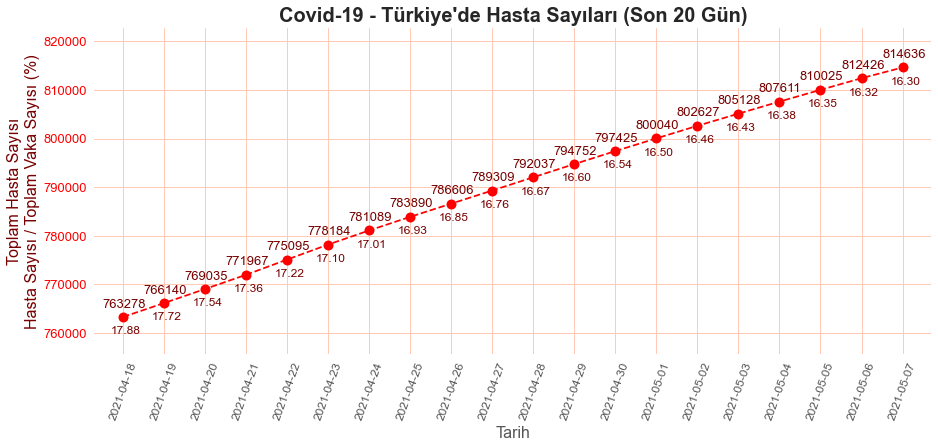

In [6]:
plt.figure(figsize=(15,6), facecolor='white')
toplam_hasta_son20 = covid19TR['Toplam Hasta'][-20:]
plt.plot(covid19TR.index[-20:], toplam_hasta_son20, marker='o', markersize=10, linestyle='--', color='r')
plt.axis([-0.7,19.7,min(toplam_hasta_son20)*0.99,max(toplam_hasta_son20)*1.01])
plt.xticks(covid19TR.index[-20:], rotation=70, fontsize=12, color='#555555')
plt.yticks(color='r', fontsize=13)
for i in range(len(covid19TR)-20,len(covid19TR)):
    plt.text(i-(len(covid19TR)-19.5), covid19TR.iloc[i,0]+2000, covid19TR.iloc[i,0], fontsize=13, color='#770000')
    plt.text(i-(len(covid19TR)-19.7), covid19TR.iloc[i,0]-3500, "{:.2f}".format(covid19TR.iloc[i,0]/covid19TR.iloc[i,9]*100),
             fontsize=12, color='#770000')
plt.title('Covid-19 - Türkiye\'de Hasta Sayıları (Son 20 Gün)', fontsize=20, fontweight='bold')
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Toplam Hasta Sayısı\nHasta Sayısı / Toplam Vaka Sayısı (%)', fontsize=16, color='#770000')
plt.grid(color='#ffc9b5')
plt.show()

Toplam hasta sayısı grafikte görüldüğü üzere **814 bini** geçmiştir! Bu sayının toplam vaka sayısına oranı da 18 Nisan 2021'de **%17.88** olduğu görülürken, 7 Mayıs 2021'de **%16.30**'a kadar gerilemiştir.

### Son 20 Güne Dair Vaka Sayısı Grafiği

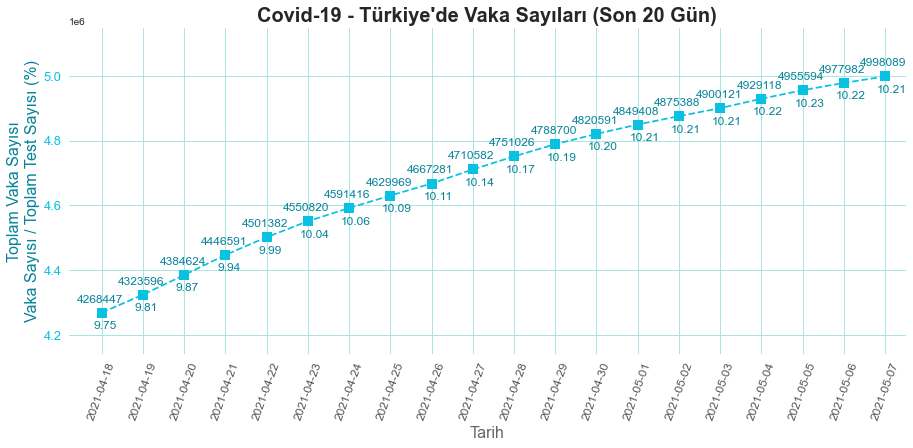

In [7]:
plt.figure(figsize=(15,6))
toplam_vaka_son20 = covid19TR['Toplam Vaka'][-20:]
plt.axis([-0.8,19.5,min(toplam_vaka_son20)*0.97,max(toplam_vaka_son20)*1.03])
plt.plot(covid19TR.index[-20:], covid19TR['Toplam Vaka'][-20:], marker='s', markersize=10, linestyle='--', color='#09c2e3')
for i in range(len(covid19TR)-20,len(covid19TR)):
    plt.text(i-len(covid19TR)+19.4, covid19TR.iloc[i,9]+32000, covid19TR.iloc[i,9], color='#068399', fontsize=12)
    plt.text(i-len(covid19TR)+19.8, covid19TR.iloc[i,9]-50000, "{:.2f}".format(covid19TR.iloc[i,9]/covid19TR.iloc[i,3]*100), 
             color="#068399", fontsize=12)
plt.title('Covid-19 - Türkiye\'de Vaka Sayıları (Son 20 Gün)', fontsize=20, fontweight='bold')
plt.xlabel('Tarih', fontsize=16, color='#666666')
plt.xticks(covid19TR.index[-20:], rotation=70, fontsize=12, color='#555555')
plt.ylabel('Toplam Vaka Sayısı\nVaka Sayısı / Toplam Test Sayısı (%)', fontsize=16, color='#068399')
plt.yticks(fontsize=13, color='#09c2e3')
plt.grid(color='#a8e6e4')
plt.show()

**10 Aralık 2020**'den itibaren paylaşılmaya başlanan ve mevcut _Günlük Vaka_ sayıları ile geriye dönük hesaplamaları da dahil olunan (yukarıdaki **NOT 5**'e bakınız) _Toplam Vaka Sayılarına_ dair grafiğe göre en son 7 Mayıs 2021'de **4 milyon 998 bin 89**'a yükselmiştir. 

Bu sayının toplam test sayısına oranı, grafikte görüldüğü gibi 5 Mayıs 2021'e kadar her geçen gün artarak **%10.23**'e kadar ulaşmış, sonrasında 7 Mayıs 2021'de **%10.21**'e doğru gerilemiştir.

### **Son 20 Güne Dair Vefat Sayısı Grafiği**

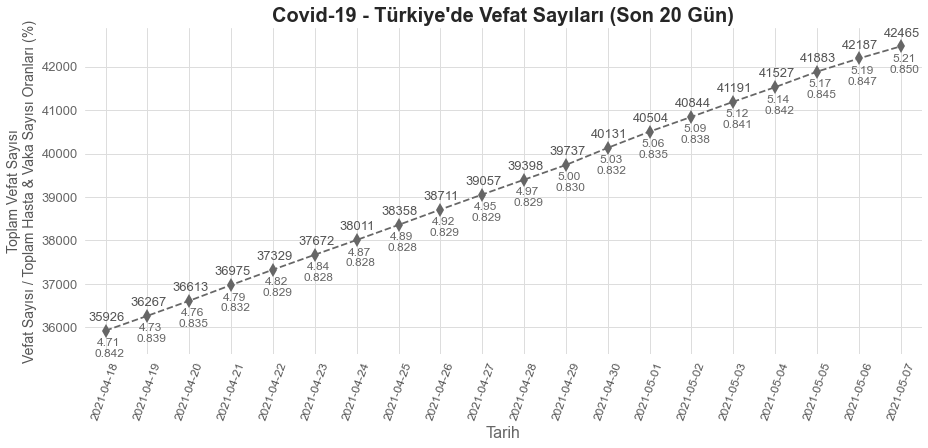

In [8]:
plt.figure(figsize=(15,6))
toplam_vefat_son20 = covid19TR['Toplam Vefat'][-20:]
plt.plot(covid19TR.index[-20:], toplam_vefat_son20, marker='d', markersize=10, linestyle='--', color='#666666')
plt.xticks(covid19TR.index[-20:], rotation=70, fontsize=12, color='#555555')
plt.yticks(color='#666666', fontsize=13)
plt.axis([-0.5,19.5,min(toplam_vefat_son20)*0.985,max(toplam_vefat_son20)*1.01])
for i in range(len(covid19TR)-20,len(covid19TR)):
    plt.text(i-(len(covid19TR)-19.6), covid19TR.iloc[i,1]+230, covid19TR.iloc[i,1], fontsize=13, color='#555555')
    plt.text(i-(len(covid19TR)-19.8), covid19TR.iloc[i,1]-350, 
             "{:.2f}".format(covid19TR.iloc[i,1]/covid19TR.iloc[i,0]*100), fontsize=12, color='#666666')
    plt.text(i-(len(covid19TR)-19.74), covid19TR.iloc[i,1]-600, 
             "{:.3f}".format(covid19TR.iloc[i,1]/covid19TR.iloc[i,9]*100), fontsize=12, color='#666666')
plt.title('Covid-19 - Türkiye\'de Vefat Sayıları (Son 20 Gün)', fontsize=20, fontweight='bold')
plt.xlabel('Tarih', fontsize=16, color='#666666')
plt.ylabel('Toplam Vefat Sayısı\nVefat Sayısı / Toplam Hasta & Vaka Sayısı Oranları (%)', fontsize=14, color='#555555')
plt.grid(color='#dddddd')
plt.show()

Toplam vefat sayısı son verilere göre **42 bin**'i aşmıştır! Toplam hasta sayısına oran, 18 Nisan 2021 tarihinde **%4.71**'de iken ne yazık ki giderek yükselmeye devam ederek 7 Mayıs 2021'de **%5.21**'e kadar ulaşmıştır!

Toplam vaka sayısına göre oranda ise en son **%0.850**'lik oranla karşılaşmaktayız.

### **Son 20 Güne Dair İyileşen Sayısı Grafiği**

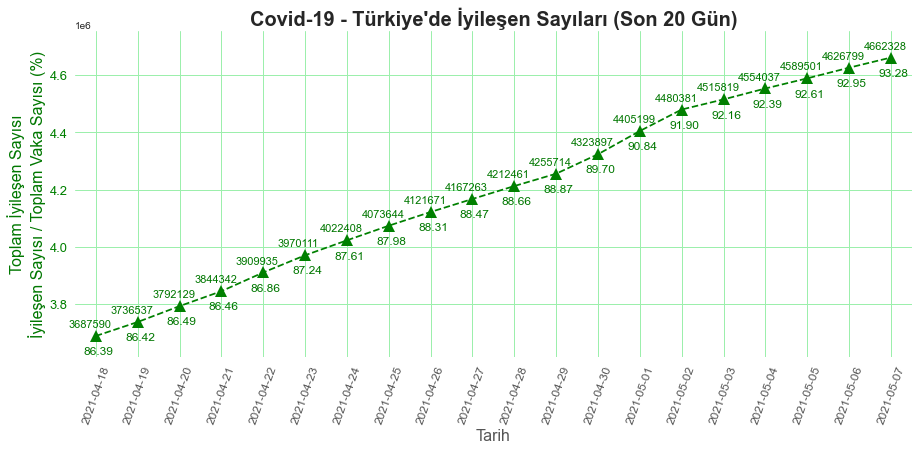

In [9]:
plt.figure(figsize=(15,6))
toplam_iyilesen_son20 = covid19TR['Toplam İyileşen'][-20:]
plt.plot(covid19TR.index[-20:], toplam_iyilesen_son20, marker='^', markersize=12, linestyle='--', color='g')
plt.xticks(covid19TR.index[-20:], rotation=70, fontsize=12, color='#555555')
plt.yticks(color='g', fontsize=13)
plt.axis([-0.5,19.5,min(toplam_iyilesen_son20)*0.98,max(toplam_iyilesen_son20)*1.02])
for i in range(len(covid19TR)-20,len(covid19TR)):
    plt.text(i-(len(covid19TR)-19.35), covid19TR.iloc[i,2]+30000, covid19TR.iloc[i,2], fontsize=11, color='#007700')
    plt.text(i-(len(covid19TR)-19.7), covid19TR.iloc[i,2]-65000, 
             "{:.2f}".format(covid19TR.iloc[i,2]/covid19TR.iloc[i,9]*100), fontsize=12, color='#007700')
plt.title('Covid-19 - Türkiye\'de İyileşen Sayıları (Son 20 Gün)', fontsize=20, fontweight='bold')
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Toplam İyileşen Sayısı\nİyileşen Sayısı / Toplam Vaka Sayısı (%)', fontsize=16, color='#007700')
plt.grid(color='#9cefac')
plt.show()

İyileşen sayısı 7 Mayıs 2021'de **4 milyon 600 bin**'i yakalamıştır. Bu sayının toplam vaka sayısına oran, **izolasyon süresi dolan vakaların** dahil edilmesiyle (yukarıdaki **NOT 6**'ya bakınız); her geçen gün **artma** eğiliminde olup son olarak **%93.28**'e kadar yükselmiştir!

### **Son Günlere Dair Günlük Hasta, Vaka, Vefat, İyileşen & Test Artışları İstatistikleri ve Dağılımları**

In [10]:
# Son 90 Gün - Hasta Artış, Vefat Artış ve Test Artış
round(covid19TR[['Hasta Artış', 'Vefat Artış', 'Test Artış', 'İyileşen Artış', 'Günlük Vaka']][-90:].describe(), 2)

,Hasta Artış,Vefat Artış,Test Artış,İyileşen Artış,Günlük Vaka
count,90.00,90.00,90.00,90.00,90.00
mean,1514.71,175.33,205301.21,24998.03,27481.27
std,907.88,110.72,72673.19,19315.84,18415.72
min,601.00,62.00,101105.00,5002.00,6287.00
25%,668.75,75.50,135435.00,7953.75,10215.00
50%,1074.00,142.00,215978.50,18715.00,22307.50
75%,2500.00,278.75,267991.50,37760.00,41700.00
max,3128.00,394.00,322128.00,81302.00,63082.00


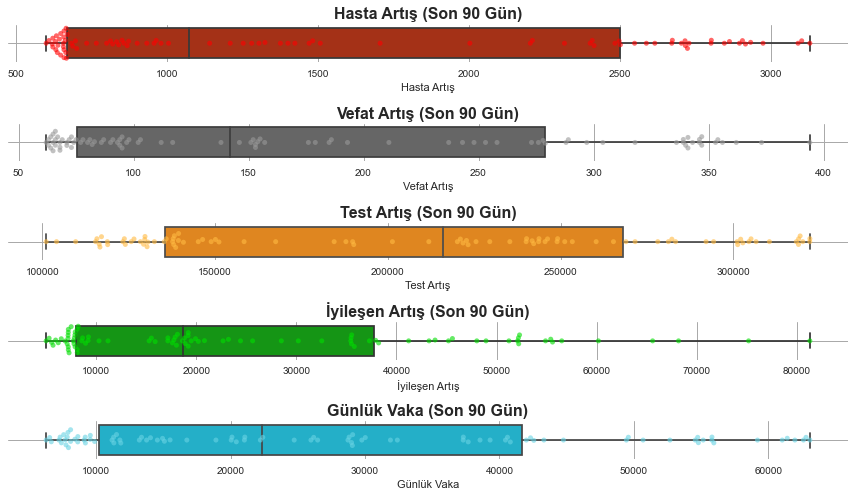

In [11]:
plt.figure(figsize=(12,7))
plt.subplot(5,1,1)
sns.boxplot(x='Hasta Artış', data=covid19TR[-90:], color='#bb2200')
sns.swarmplot(x='Hasta Artış', data=covid19TR[-90:], color='#ff0000', alpha=0.6)
plt.title('Hasta Artış (Son 90 Gün)', fontsize=16, fontweight='bold')
plt.grid(color='#aaaaaa')
plt.subplot(5,1,2)
sns.boxplot(x='Vefat Artış', data=covid19TR[-90:], color='#666666')
sns.swarmplot(x='Vefat Artış', data=covid19TR[-90:], color='#999999', alpha=0.6)
plt.title('Vefat Artış (Son 90 Gün)', fontsize=16, fontweight='bold')
plt.grid(color='#aaaaaa')
plt.subplot(5,1,3)
sns.boxplot(x='Test Artış', data=covid19TR[-90:], color='#ff8800')
sns.swarmplot(x='Test Artış', data=covid19TR[-90:], color='#ffba42', alpha=0.6)
plt.title('Test Artış (Son 90 Gün)', fontsize=16, fontweight='bold')
plt.grid(color='#aaaaaa')
plt.subplot(5,1,4)
sns.boxplot(x='İyileşen Artış', data=covid19TR[-90:], color='#00aa00')
sns.swarmplot(x='İyileşen Artış', data=covid19TR[-90:], color='#00dd00', alpha=0.6)
plt.title('İyileşen Artış (Son 90 Gün)', fontsize=16, fontweight='bold')
plt.grid(color='#aaaaaa')
plt.subplot(5,1,5)
sns.boxplot(x='Günlük Vaka', data=covid19TR[-90:], color='#09c2e3')
sns.swarmplot(x='Günlük Vaka', data=covid19TR[-90:], color='#68d3e3', alpha=0.6)
plt.title('Günlük Vaka (Son 90 Gün)', fontsize=16, fontweight='bold')
plt.grid(color='#aaaaaa')
plt.tight_layout()
plt.show()

### Tüm Günler - Hasta, Vaka, Vefat & İyileşen Artış Sayıları + Sonraki Günlere Ait Tahminler

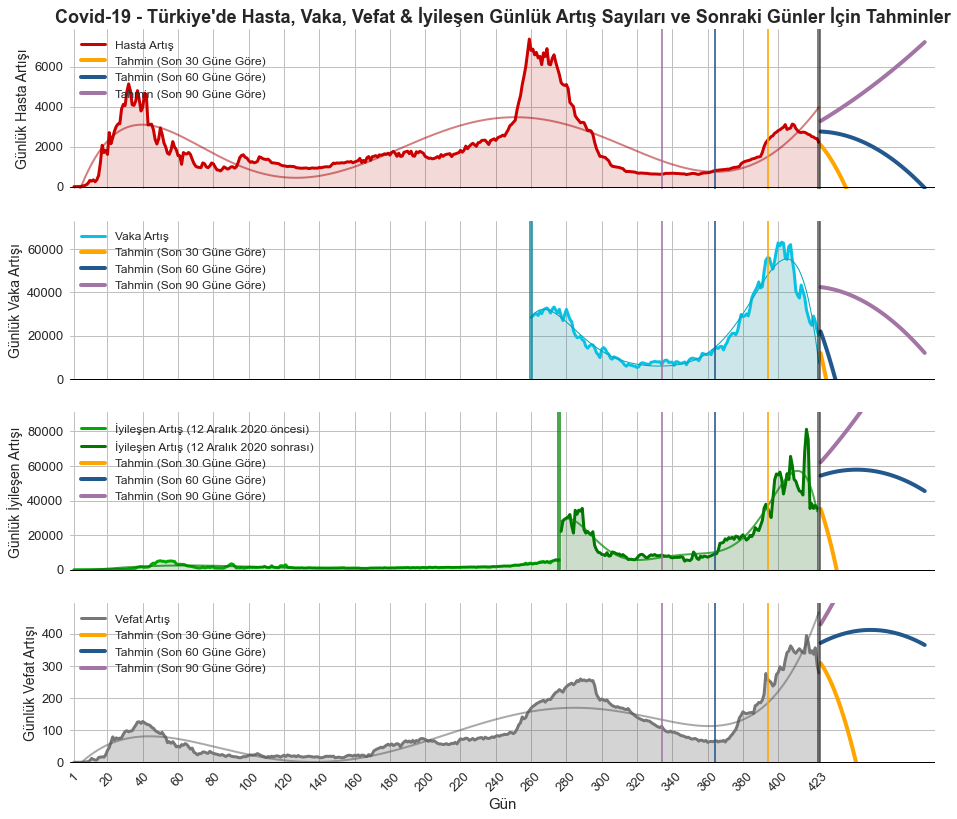

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
hasta_artis = covid19TR['Hasta Artış']
vefat_artis = covid19TR['Vefat Artış']
vaka_artis = covid19TR['Günlük Vaka'][259:]
iyilesen_artis_12ara2020_once = covid19TR['İyileşen Artış'][:276]
iyilesen_artis_12ara2020_sonra = covid19TR['İyileşen Artış'][277:]
gun_cizgiler = np.array([0, 19, 39, 59, 79, 99, 119, 139, 159, 179, 199, 219, 239, 259, 279, 299, 319, 339, 359, 379, 399,
                         len(covid19TR)-1])
gun_araliklar = [30, 60, 90]
renk=['orange', '#23588d', '#a375a4']
y_ileri_tahminler = []
polynomial = PolynomialFeatures(degree=2)
linear = LinearRegression()
for s in range(1,5):
    y_ileri_tahmin = []
    for g in gun_araliklar:
        if s == 1:     y = hasta_artis.values[-g:].reshape(-1,1)
        elif s == 2:   y = vaka_artis.fillna(0).values[-g:].reshape(-1,1)
        elif s == 3:   y = iyilesen_artis_12ara2020_sonra.values[-g:].reshape(-1,1)
        elif s == 4:   y = vefat_artis.values[-g:].reshape(-1,1)
        x = np.array(list(range(len(y)))).reshape(-1,1)
        x_test = np.array(list(range(len(y), len(y)+60))).reshape(-1,1)
        x_poly = polynomial.fit_transform(x)
        x_test_poly = polynomial.fit_transform(x_test)
        linear.fit(x_poly, y)
        y_ileri_tahmin.append(linear.predict(x_test_poly))
    y_ileri_tahminler.append(y_ileri_tahmin)
y_mevcut_tahminler = []
polynomial = PolynomialFeatures(degree=6)
for s in range(1,6): 
    if s == 1:    y = hasta_artis.fillna(0).values.reshape(-1,1)
    elif s == 2:  y = vaka_artis.fillna(0).values.reshape(-1,1)
    elif s == 3:  y = iyilesen_artis_12ara2020_once.fillna(0).values.reshape(-1,1)
    elif s == 4:  y = iyilesen_artis_12ara2020_sonra.fillna(0).values.reshape(-1,1)
    elif s == 5:  y = vefat_artis.fillna(0).values.reshape(-1,1)
    x = np.array(list(range(len(y)))).reshape(-1,1)
    x_poly = polynomial.fit_transform(x)
    linear.fit(x_poly, y)
    y_mevcut_tahminler.append(linear.predict(x_poly))
def plot_cizdir(veri, y_alt, y_ust, y_etiket, x_tick, x_tick_metin):
    plt.axis([-2, len(covid19TR)+65, y_alt, veri.max()+y_ust])
    plt.axvline(x=len(covid19TR)-1, color='k', linewidth=4, alpha=0.5)
    plt.axhline(0, color='k', linewidth=1)
    plt.yticks(fontsize=13)
    plt.ylabel(y_etiket, fontsize=14)
    plt.xticks(x_tick, x_tick_metin, fontsize=13, rotation=45)
    plt.grid(color='#c0c0c0')
    plt.legend(loc='upper left', fontsize=12)  
def veri_cizdir(veri, baslangic, bitis, renk, kalinlik=1, alpha=1, etiket=None):
    plt.plot(range(baslangic, bitis), veri, color=renk, linewidth=kalinlik, alpha=alpha, label=etiket) 
def tahmin_cizdir(veri, gunler, renk, etiket, kalinlik=1):
    plt.plot(gunler, veri, color=renk, label=etiket, linewidth=kalinlik)
def alan_doldur(veri, baslangic, bitis, renk, alpha):
    plt.fill_between(range(baslangic, bitis), veri, color=renk, alpha=alpha)
def cizgi_yerlestir(pozisyon, renk, alpha, kalinlik):
    plt.axvline(x=pozisyon, color=renk, alpha=alpha, linewidth=kalinlik)
plt.figure(figsize=(15.5,13.5))
plt.subplot(4,1,1)
plt.title('Covid-19 - Türkiye\'de Hasta, Vaka, Vefat & İyileşen Günlük Artış Sayıları ve Sonraki Günler İçin Tahminler', 
          fontsize=18, fontweight='bold')
veri_cizdir(hasta_artis, 0, len(covid19TR), '#cc0000', 3, 1, 'Hasta Artış')
veri_cizdir(y_mevcut_tahminler[0], 0, len(covid19TR), '#aa0000', 2, 0.5)
alan_doldur(hasta_artis, 0, len(covid19TR), '#bb0000', 0.15)
for i in range(len(gun_araliklar)):
    tahmin_cizdir(y_ileri_tahminler[0][i], x_test+len(covid19TR)-90, renk[i], 
                  'Tahmin (Son ' + str(gun_araliklar[i]) + ' Güne Göre)', 4)
    cizgi_yerlestir(len(covid19TR)-gun_araliklar[i], renk[i], 0.8, 2)
plot_cizdir(hasta_artis, -100, 500, 'Günlük Hasta Artışı', gun_cizgiler, 
            ['' for _ in range(len(gun_cizgiler))])
plt.subplot(4,1,2)
veri_cizdir(vaka_artis, 259, len(covid19TR), '#09c2e3', 3, 1, 'Vaka Artış')
veri_cizdir(y_mevcut_tahminler[1], 259, len(covid19TR), '#07a3b9')
alan_doldur(vaka_artis, 259, len(covid19TR), '#068399', 0.2)
cizgi_yerlestir(259, '#068399', 0.7, 4)
for i in range(len(gun_araliklar)):
    tahmin_cizdir(y_ileri_tahminler[1][i], x_test+len(covid19TR)-90, renk[i], 
                  'Tahmin (Son ' + str(gun_araliklar[i]) + ' Güne Göre)', 4)
    cizgi_yerlestir(len(covid19TR)-gun_araliklar[i], renk[i], 0.8, 2)
plot_cizdir(vaka_artis, -500, 10000, 'Günlük Vaka Artışı', gun_cizgiler, 
            ['' for _ in range(len(gun_cizgiler))])
plt.subplot(4,1,3)
veri_cizdir(iyilesen_artis_12ara2020_once, 0, len(iyilesen_artis_12ara2020_once), '#00aa00', 3, 1, 
            'İyileşen Artış (12 Aralık 2020 öncesi)')
veri_cizdir(y_mevcut_tahminler[2], 0, len(y_mevcut_tahminler[2]), '#007700', 2, 0.7)
veri_cizdir(iyilesen_artis_12ara2020_sonra, 276, len(iyilesen_artis_12ara2020_sonra)+276, '#007700', 3, 1,
            'İyileşen Artış (12 Aralık 2020 sonrası)')
veri_cizdir(y_mevcut_tahminler[3], 276, len(covid19TR)-1, '#008800', 2, 0.7)
alan_doldur(iyilesen_artis_12ara2020_once, 0, len(covid19TR[:276]), '#008800', 0.2)
alan_doldur(iyilesen_artis_12ara2020_sonra, 276, len(covid19TR)-1, '#005500', 0.2)
cizgi_yerlestir(275, 'g', 0.7, 4)
for i in range(len(gun_araliklar)):
    tahmin_cizdir(y_ileri_tahminler[2][i], x_test+len(covid19TR)-90, renk[i], 
                  'Tahmin (Son ' + str(gun_araliklar[i]) + ' Güne Göre)', 4)
    cizgi_yerlestir(len(covid19TR)-gun_araliklar[i], renk[i], 0.8, 2)
plot_cizdir(iyilesen_artis_12ara2020_sonra, -1000, 10000, 'Günlük İyileşen Artışı', gun_cizgiler, 
            ['' for _ in range(len(gun_cizgiler))])
plt.subplot(4,1,4)
veri_cizdir(vefat_artis, 0, len(covid19TR), '#777777', 3, 1, 'Vefat Artış')
veri_cizdir(y_mevcut_tahminler[4], 0, len(covid19TR), '#555555', 2, 0.5)
alan_doldur(vefat_artis, 0, len(covid19TR), '#555555', 0.25)
for i in range(len(gun_araliklar)):
    tahmin_cizdir(y_ileri_tahminler[3][i], x_test+len(covid19TR)-90, renk[i],
                 'Tahmin (Son ' + str(gun_araliklar[i]) + ' Güne Göre)', 4)
    cizgi_yerlestir(len(covid19TR)-gun_araliklar[i], renk[i], 0.8, 2)
plot_cizdir(vefat_artis, -2, 100, 'Günlük Vefat Artışı', gun_cizgiler, gun_cizgiler+1)
plt.xlabel('Gün', fontsize=15)
plt.show()

_**ÖNEMLİ:** 12 Aralık 2020 gününe ait iyileşen artış sayısının 1 milyonun üzerinde çıkmasından dolayı tutarlılık açısından ilgili grafiğe dahil edilmemiştir!_

_Makine öğrenmesi yardımıyla_ gelecekteki günler için tahminlere baktığımızda;

* _Hasta_ sayısında son 30 ve 60 güne göre **giderek azalacağı** ve bu azalmanın son 30 günlük verilere göre **daha hızlı** olacağı; son 90 güne göre ise **yukarı şekilde** yükseleceği, 
* _Vaka_ sayısında mevcut gün aralıklarındaki veriler değerlendirildiğinde **hızla düşüş olacağı** ama son 90 güne göre bu düşüşün **daha yavaş** kalacağı,
* _İyileşen_ sayısında son 30 güne göre **çok hızlı düşü olacağı**, son 60 güne göre **önce hafifçe yükselip sonra azalma eğiliminde** olacağı ve son 90 güne göre **yükselmeye devam edeceği**,
* _Vefat_ sayısında ise iyileşen sayısı için yapılan öngörülerin burada da **aynen geçerli olduğu** söylenebilir!

### **Son 20 Gün İçindeki Hasta Sayısı Artışları**

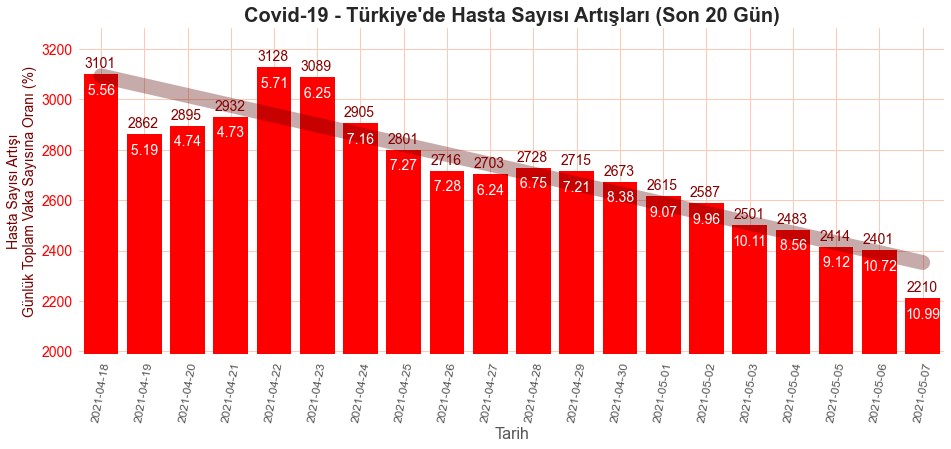

In [13]:
plt.figure(figsize=(15.5,6))
hasta_artis_son20 = covid19TR['Hasta Artış'][-20:]
slp, intcp = np.polyfit(list(range(20)), hasta_artis_son20, 1)
plt.bar(covid19TR.index[-20:], hasta_artis_son20, color='r')
plt.axis([-0.5,19.5,hasta_artis_son20.min()*0.9,hasta_artis_son20.max()*1.05])
plt.xticks(covid19TR.index[-20:], rotation=80, fontsize=12, color='#555555')
plt.yticks(color='r', fontsize=14)
for i in range(len(covid19TR)-20,len(covid19TR)):
    plt.text(i-(len(covid19TR)-19.62), covid19TR.iloc[i,10]+25, 
             "{:4}".format(int(covid19TR.iloc[i,10])), fontsize=14, color='#880000')
    plt.text(i-(len(covid19TR)-19.6), covid19TR.iloc[i,10]-80, 
             "{:5.2f}".format(round(covid19TR.iloc[i,10] / covid19TR.iloc[i,8] * 100, 2)), fontsize=14, color='white')
plt.plot([0, 19],[intcp, intcp+(slp*19)], color='#550000', linewidth=15, alpha=0.33)
plt.title('Covid-19 - Türkiye\'de Hasta Sayısı Artışları (Son 20 Gün)', fontsize=20, fontweight='bold')
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Hasta Sayısı Artışı\nGünlük Toplam Vaka Sayısına Oranı (%)', fontsize=14, color='#770000')
plt.grid(color='#ffc9b5')
plt.show()

Son 20 günün hasta sayısı artışları incelendiğinde; en yüksek sayı **3128 ile 22 Nisan 2021**'de ölçülmüştür ve özellikle bu tarihten sonra **düşüşlerin olduğu** saptanmıştır ki en son 7 Mayıs 2021'de **2210**'a kadar gerilemiştir! 

Günlük toplam vaka sayısına oranlarda ise **gözle görülür şekilde artış** mevcuttur ve en yüksek oran yine 7 Mayıs 2021'de **%10.99** olarak gerçekleşmiştir!

### Son 20 Gün İçindeki Günlük Vaka Sayısı

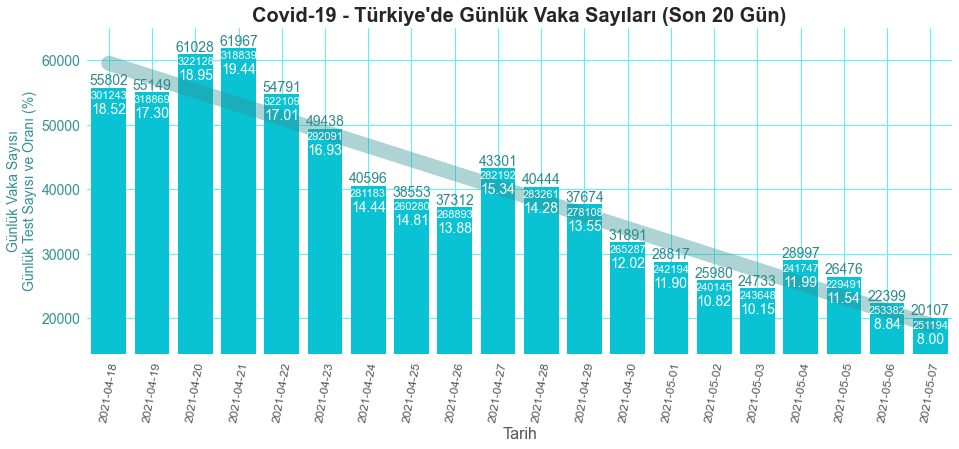

In [14]:
plt.figure(figsize=(15.5,6))
gunluk_vaka_son20 = covid19TR['Günlük Vaka'][-20:]
slp, intcp = np.polyfit(list(range(20)), gunluk_vaka_son20, 1)
plt.bar(covid19TR.index[-20:], gunluk_vaka_son20, color='#09c2d3')
plt.axis([-0.5,19.5,gunluk_vaka_son20.min()*0.72,gunluk_vaka_son20.max()*1.05])
plt.xticks(covid19TR.index[-20:], rotation=80, fontsize=12, color='#555555')
plt.yticks(color='#339196', fontsize=14)
for i in range(len(covid19TR)-20,len(covid19TR)):
    plt.text(i-(len(covid19TR)-19.55), covid19TR.iloc[i,8]+400, 
             "{:5}".format(int(covid19TR.iloc[i,8])), fontsize=14, color='#2e8a8d')
    plt.text(i-(len(covid19TR)-19.58), covid19TR.iloc[i,8]-1700, int(covid19TR.iloc[i,13]), fontsize=11, color='white')
    plt.text(i-(len(covid19TR)-19.60), covid19TR.iloc[i,8]-4000, 
            "{:5.2f}".format(covid19TR.iloc[i,8] / covid19TR.iloc[i,13] * 100), fontsize=14, color='white')
plt.plot([0, 19],[intcp, intcp+(slp*19)], color='#339196', linewidth=15, alpha=0.4)
plt.title('Covid-19 - Türkiye\'de Günlük Vaka Sayıları (Son 20 Gün)', fontsize=20, fontweight='bold')
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Günlük Vaka Sayısı\nGünlük Test Sayısı ve Oranı (%)', fontsize=14, color='#339196')
plt.grid(color='#56f4fc')
plt.show()

Son 20 günün vaka sayıları incelendiğinde, pozitif vakalar 18-22 Nisan 2021'de **50 binin üzerinde** iken, ilerleyen günlerde **düşüşler** gözlemlenmiştir; üstelik tam kapanmanın başladığı 30 Nisan 2021 tarihinden sonra **daha da aşağılara düşerek** en son 7 Mayıs 2021'de **20107** olmuştur.

Günlük test sayısına oranlarda ise en yüksek oran **%19.44** ile 21 Nisan 2021'de ölçülmüş olup, vaka sayılarının son günlerde düşmesi oranlara da yansımıştır ki 7 Mayıs 2021'de **%8**'e kadar gerilemiştir!

### **Son 20 Gün İçindeki Vefat Sayısı Artışları**

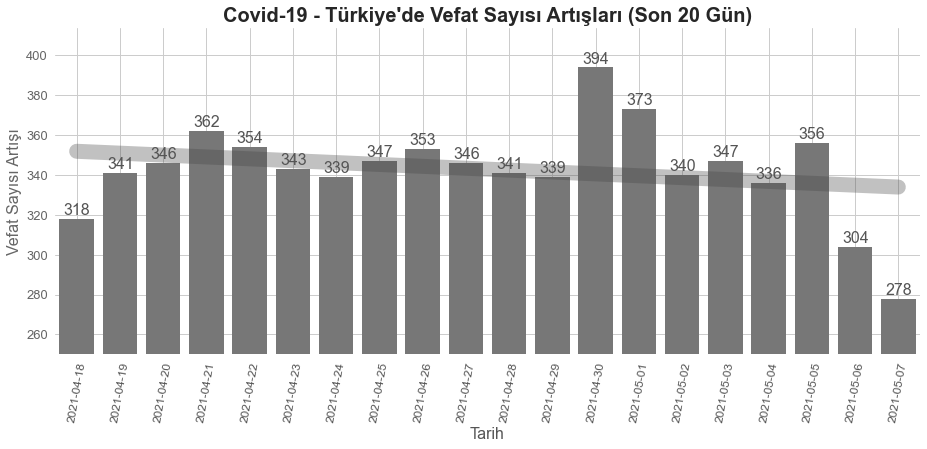

In [15]:
plt.figure(figsize=(15.5,6))
vefat_artis_son20 = covid19TR['Vefat Artış'][-20:]
slp, intcp = np.polyfit(list(range(20)), vefat_artis_son20, 1)
plt.bar(covid19TR.index[-20:], vefat_artis_son20, color='#777777')
plt.axis([-0.5,19.5,vefat_artis_son20.min()*0.9,vefat_artis_son20.max()*1.05])
plt.xticks(covid19TR.index[-20:], rotation=80, fontsize=12, color='#555555')
plt.yticks(color='#666666', fontsize=13)
for i in range(len(covid19TR)-20,len(covid19TR)):
    plt.text(i-(len(covid19TR)-19.7), covid19TR.iloc[i,11]+2, 
             "{:3}".format(int(covid19TR.iloc[i,11])), fontsize=16, color='#555555')
plt.plot([0, 19], [intcp, intcp+(slp*19)], color='#444444', linewidth=15, alpha=0.33)
plt.title('Covid-19 - Türkiye\'de Vefat Sayısı Artışları (Son 20 Gün)', fontsize=20, fontweight='bold')
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Vefat Sayısı Artışı', fontsize=16, color='#666666')
plt.grid(color='#cccccc')
plt.show()

Son 20 günün vefat sayılarına bakıldığında, genel anlamda sayıların **300**'ün üzerinde seyrettiği ve hatta **30 Nisan 2021**'de **400**'e doğru yaklaştığı gözlemlenmektedir!

Son iki günde açıklanan sayılar **304** ve **278** olarak açıklanmış olup ilerleyen günlerde **düşüşlerin** olabileceği ihtimalini kuvvetlendirmiştir.

### **Son 2 Hafta İçindeki İyileşen Sayısı Artışları**

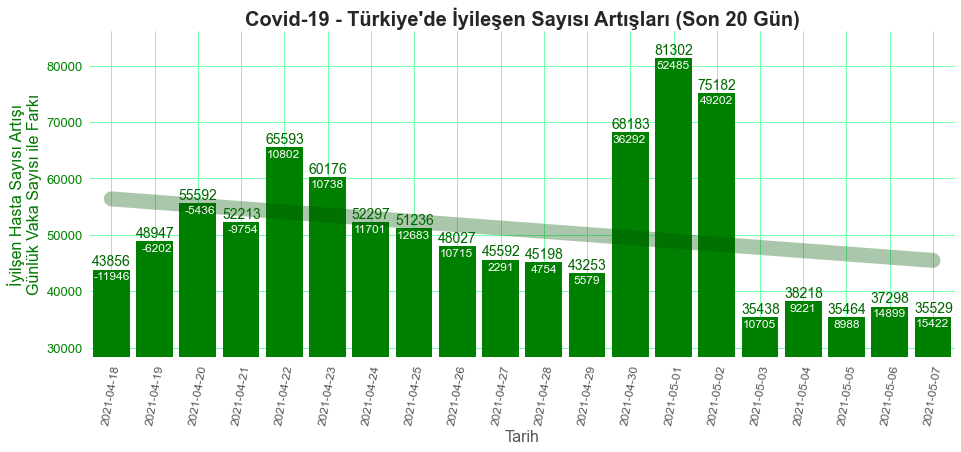

In [16]:
plt.figure(figsize=(15.5,6))
index = covid19TR['İyileşen Artış'][-20:].index
iyilesen_artis = covid19TR['İyileşen Artış'][-20:]
gunluk_vaka = covid19TR['Günlük Vaka'][-20:]
slp, intcp = np.polyfit(list(range(20)), iyilesen_artis, 1)
plt.bar(index, iyilesen_artis, color='g', width=0.85)
plt.axis([-0.5,19.5,iyilesen_artis.min()*0.80,iyilesen_artis.max()*1.06])
plt.xticks(index, rotation=80, fontsize=12, color='#555555')
plt.yticks(color='g', fontsize=13)
for i in range(len(iyilesen_artis)):
    if iyilesen_artis[i] >= 10000:    sh = 0.44
    else:    sh = 0.36
    plt.text(i-sh, iyilesen_artis[i]+700, int(iyilesen_artis[i]), fontsize=14, color='#006600')
    if abs(iyilesen_artis[i] - gunluk_vaka[i]) >= 10000:    sh = 0.4
    elif abs(iyilesen_artis[i] - gunluk_vaka[i]) >= 1000:   sh = 0.31
    elif abs(iyilesen_artis[i] - gunluk_vaka[i]) >= 100:    sh = 0.25
    else:    sh = 0.17
    plt.text(i-sh, iyilesen_artis[i]-1800, int(iyilesen_artis[i] - gunluk_vaka[i]), fontsize=12, color='white')
plt.plot([0, 19], [intcp, intcp+(slp*19)], color='#005500', linewidth=15, alpha=0.33)
plt.title('Covid-19 - Türkiye\'de İyileşen Sayısı Artışları (Son 20 Gün)', fontsize=20, fontweight='bold')
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('İyilşen Hasta Sayısı Artışı\nGünlük Vaka Sayısı ile Farkı', fontsize=16, color='#007700')
plt.grid(color='#7cffac')
plt.show()

Günlük iyileşen hasta sayısı, 12 Aralık 2020'de **izolasyon süresi dolan vakaların** da dahil edilmesinden sonra (yukarıdaki **NOT 6**'ya bakınız), son 20 gün içinde en yüksek sayı **81302** ile **1 Mayıs 2021**'de görülmüştür. Bu tarihten önce çğoğunlukla **50 binin** üzerinde sayılar görülebilirken, aksine son beş günde **35 binler** civarında sayılarla karşılaşılması dikkat çekmektedir.

Bunun yanında, günlük vaka sayısına en yüksek farklarda, **artı (+) yönde 52485** ile **1 Mayıs 2021**'de, **eksi(-) yönde 11946** ile **18 Nisan 2021**'de ölçülmüştür. Ayrıca **22 Nisan 2021**'den sonra tüm iyileşen sayılarının günlük vaka sayılarında **daha yüksek** olduğu kesin olarak söylenebilir!

### **Son 20 Gün İçindeki Günlük İyileşen Sayısının Vaka Sayısına Oranı**

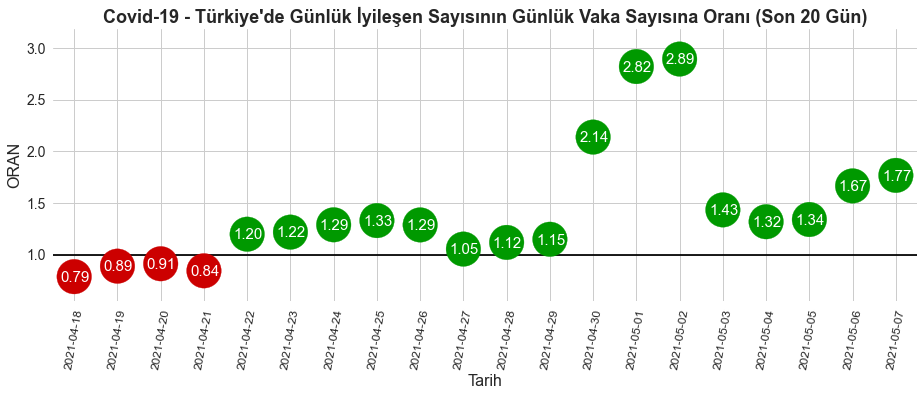

In [17]:
index = covid19TR['İyileşen Artış'][-20:].index
iyilesen_artis = covid19TR['İyileşen Artış'][-20:]
gunluk_vaka = covid19TR['Günlük Vaka'][-20:]
oranlar = iyilesen_artis / gunluk_vaka
colors = []
for i in range(20):
    if oranlar[i] < 1.0:    colors.append('#cc0000')
    else:    colors.append('#009900')
plt.figure(figsize=(15.5,5))
plt.axis([-0.5, 19.5, min(oranlar)*0.7, max(oranlar)*1.1])
plt.axhline(1.0, color='black', zorder=1)
plt.scatter(index, oranlar, marker="o", s=1200, color=colors, zorder=2)
for i in range(20):
    plt.text(i-0.32, oranlar[i]-0.05, "{:.2f}".format(round(oranlar[i], 2)), color='white', fontsize=15)
plt.title("Covid-19 - Türkiye\'de Günlük İyileşen Sayısının Günlük Vaka Sayısına Oranı (Son 20 Gün)", 
          fontsize=18, fontweight='bold')
plt.xlabel('Tarih', fontsize=16)
plt.ylabel('ORAN', fontsize=16)
plt.xticks(rotation=80, fontsize=12)
plt.yticks(fontsize=14)
plt.grid(color='#cccccc', zorder=0)
plt.show()

12 Aralık 2020'den sonra **izolasyon süresi dolan vakaların** da dahil edilmesinden sonra (yukarıdaki **NOT 6**'ya bakınız), son 20 gün içindeki günlük iyileşen sayısının günlük vaka sayısına oranlarda **22 Nisan 2021** tarihinden sonra gözle görülür şekilde **1'in üzerinde** oranlar gözlemlenmektedir. Özellikle **30 Nisan-2 Mayıs 2021** tarihleri arasında **2'nin üzerinde** çıkmış olması (en yüksek **2.89**) ve devamındaki günlerde en az **1.3** oranda seyretmesi _aktif vaka sayılarının_ düşmesi için önemli bir göstergedir!

### **Tüm Günler Hasta/Vefat/İyileşen/Günlük Vaka Sayılarının Birbirleriyle İlişkileri ve Katsayıları**

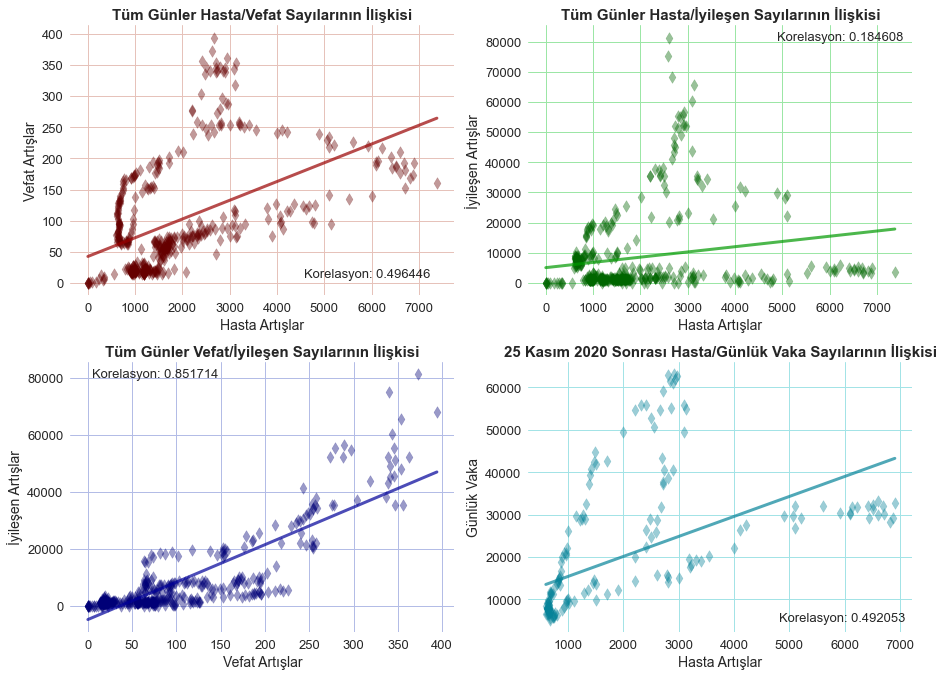

In [18]:
hasta_artis = covid19TR['Hasta Artış'][1:]
vefat_artis = covid19TR['Vefat Artış'][1:]
hasta_artis_12ara2020_haric = np.concatenate((covid19TR['Hasta Artış'][1:276].values,covid19TR['Hasta Artış'][277:].values))
iyilesen_artis_12ara2020_haric = np.concatenate((covid19TR['İyileşen Artış'][1:276].values,
                                                 covid19TR['İyileşen Artış'][277:].values))
slp1, intcp1 = np.polyfit(hasta_artis,vefat_artis,1)
x1 = [0, hasta_artis.max()]
y1 = [intcp1+x1[0], intcp1+(slp1*x1[1])]
plt.figure(figsize=(13.5,9.5))
plt.subplot(2, 2, 1)
plt.plot(x1, y1, alpha=0.7, linewidth=3, color='#990000')
plt.scatter(hasta_artis, vefat_artis, marker='d', s=70, color='#660000', alpha=0.4)
plt.text(hasta_artis.max()-2800, 10,
         "Korelasyon: " + str(round(np.corrcoef(hasta_artis,vefat_artis)[0,1], 6)),
         fontsize=13)
plt.title('Tüm Günler Hasta/Vefat Sayılarının İlişkisi', fontsize=15, fontweight='bold')
plt.xlabel('Hasta Artışlar', fontsize=14)
plt.ylabel('Vefat Artışlar', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(color='#e6c2ba')
slp2, intcp2 = np.polyfit(hasta_artis_12ara2020_haric, iyilesen_artis_12ara2020_haric, 1)
x2 = [0, hasta_artis_12ara2020_haric.max()]
y2 = [intcp2+x2[0], intcp2+(slp2*x2[1])]
plt.subplot(2, 2, 2)
plt.scatter(hasta_artis_12ara2020_haric, iyilesen_artis_12ara2020_haric, marker='d', s=70, color='#006600', alpha=0.4)
plt.plot(x2, y2, alpha=0.7, linewidth=3, color='#009900')
plt.text(hasta_artis_12ara2020_haric.max()-2500, iyilesen_artis_12ara2020_haric.max()-1000,
        "Korelasyon: " + str(round(np.corrcoef(hasta_artis_12ara2020_haric, iyilesen_artis_12ara2020_haric)[0,1], 6)), 
         fontsize=13)
plt.title('Tüm Günler Hasta/İyileşen Sayılarının İlişkisi', fontsize=15, fontweight='bold')
plt.xlabel('Hasta Artışlar', fontsize=14)
plt.ylabel('İyileşen Artışlar', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(color='#9ce6a6')
vefat_artis_12ara2020_haric = np.concatenate((covid19TR['Vefat Artış'][1:276].values,covid19TR['Vefat Artış'][277:].values))
slp3, intcp3 = np.polyfit(vefat_artis_12ara2020_haric, iyilesen_artis_12ara2020_haric, 1)
x3 = [0, vefat_artis_12ara2020_haric.max()]
y3 = [intcp3+x3[0], intcp3+(slp3*x3[1])]
plt.subplot(2, 2, 3)
plt.scatter(vefat_artis_12ara2020_haric, iyilesen_artis_12ara2020_haric, marker='d', s=70, color='#000077', alpha=0.4)
plt.plot(x3, y3, alpha=0.7, linewidth=3, color='#000099')
plt.text(vefat_artis_12ara2020_haric.min()+5, iyilesen_artis_12ara2020_haric.max()-1000,
         "Korelasyon: " + str(round(np.corrcoef(vefat_artis_12ara2020_haric, iyilesen_artis_12ara2020_haric)[0,1], 6)), 
         fontsize=13)
plt.title('Tüm Günler Vefat/İyileşen Sayılarının İlişkisi', fontsize=15, fontweight='bold')
plt.xlabel('Vefat Artışlar', fontsize=14)
plt.ylabel('İyileşen Artışlar', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(color='#b3bce6')
hasta_artis_25kas2020_sonra = covid19TR['Hasta Artış'][259:]
gunluk_vaka_25kas2020_sonra = covid19TR['Günlük Vaka'][259:]
slp4, intcp4 = np.polyfit(hasta_artis_25kas2020_sonra, gunluk_vaka_25kas2020_sonra, 1)
x4 = [hasta_artis_25kas2020_sonra.min(), hasta_artis_25kas2020_sonra.max()]
y4 = [intcp4, intcp4+(slp4*(x4[1]))]
plt.subplot(2, 2, 4)
plt.scatter(hasta_artis_25kas2020_sonra, gunluk_vaka_25kas2020_sonra, marker='d', s=70, color='#068399', alpha=0.4)
plt.title('25 Kasım 2020 Sonrası Hasta/Günlük Vaka Sayılarının İlişkisi', fontsize=15, fontweight='bold')
plt.xlabel('Hasta Artışlar', fontsize=14)
plt.ylabel('Günlük Vaka', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.plot(x4, y4, alpha=0.7, linewidth=3, color='#068399')
plt.text(hasta_artis_25kas2020_sonra.max()-2100, gunluk_vaka_25kas2020_sonra.min()-500,
         "Korelasyon: " + str(round(np.corrcoef(hasta_artis_25kas2020_sonra,gunluk_vaka_25kas2020_sonra)[0,1], 6)),
         fontsize=13)
plt.grid(color='#a3e3e6')
plt.tight_layout()
plt.show()

_**ÖNEMLİ:** 12 Aralık 2020'ye ait iyileşen artış sayısının 1 milyonun üzerinde çıkmasından dolayı tutarlılık açısından ilgili grafiklere dahil edilmemiştir!_

### **Son Günlere Dair Hasta, Vaka, Vefat & İyileşen Sayısı Değişimi İstatistikleri ve Dağılımları**

In [19]:
# Son 90 Gün - Hasta ve Vefat Sayısı Değişimleri
round(covid19TR[['Hasta +/-', 'Vefat +/-', 'İyileşen +/-', 'Vaka +/-']][-90:].describe(),2)

,Hasta +/-,Vefat +/-,İyileşen +/-,Vaka +/-
count,90.00,90.00,90.00,90.00
mean,17.69,1.89,304.89,135.67
std,73.23,14.59,6121.83,2761.52
min,-239.00,-52.00,-39744.00,-8842.00
25%,-5.00,-4.00,-1165.25,-1183.25
50%,13.00,1.00,29.00,86.00
75%,33.75,6.00,1622.00,1503.50
max,297.00,65.00,24930.00,7033.00


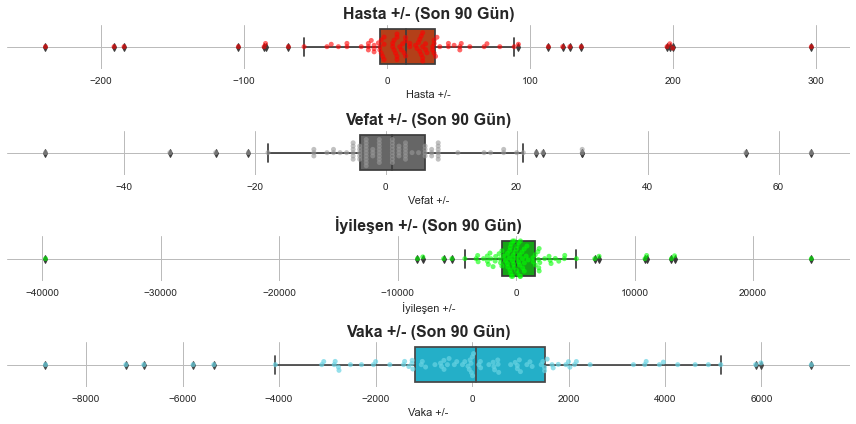

In [20]:
plt.figure(figsize=(12,6))
plt.subplot(4,1,1)
sns.boxplot(x='Hasta +/-', data=covid19TR[-90:], color='#cc3300')
sns.swarmplot(x='Hasta +/-', data=covid19TR[-90:], color='#ff0000', alpha=0.6)
plt.grid(color='#bbbbbb')
plt.title('Hasta +/- (Son 90 Gün)', fontsize=16, fontweight='bold')
plt.subplot(4,1,2)
sns.boxplot(x='Vefat +/-', data=covid19TR[-90:], color='#666666')
sns.swarmplot(x='Vefat +/-', data=covid19TR[-90:], color='#999999', alpha=0.6)
plt.grid(color='#bbbbbb')
plt.title('Vefat +/- (Son 90 Gün)', fontsize=16, fontweight='bold')
plt.subplot(4,1,3)
sns.boxplot(x='İyileşen +/-', data=covid19TR[-90:], color='#00bb00')
sns.swarmplot(x='İyileşen +/-', data=covid19TR[-90:], color='#00ff00', alpha=0.6)
plt.grid(color='#bbbbbb')
plt.title('İyileşen +/- (Son 90 Gün)', fontsize=16, fontweight='bold')
plt.subplot(4,1,4)
sns.boxplot(x='Vaka +/-', data=covid19TR[-90:], color='#09c2e3')
sns.swarmplot(x='Vaka +/-', data=covid19TR[-90:], color='#68d3e3', alpha=0.7)
plt.grid(color='#bbbbbb')
plt.title('Vaka +/- (Son 90 Gün)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### **Son 20 Günün Hasta Sayısı Değişim Grafiği**

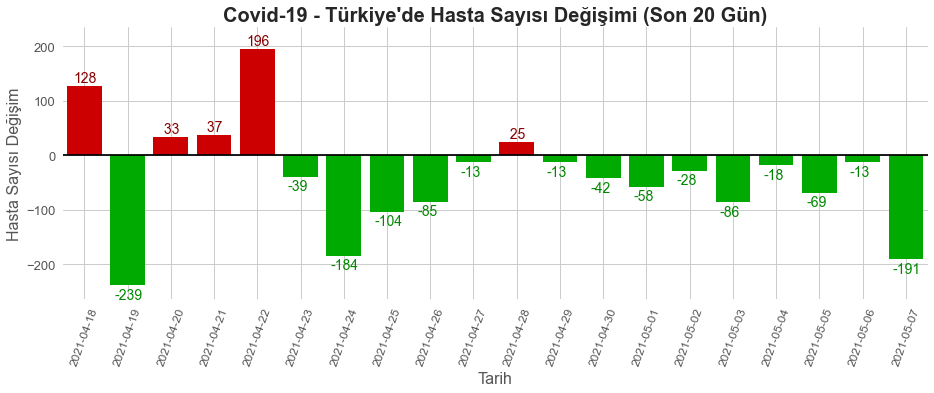

In [21]:
hasta_degisim = covid19TR['Hasta +/-'][-20:]
plt.figure(figsize=(15.5,5))
barc = []
for i in range(len(covid19TR)-20,len(covid19TR)):
    if covid19TR.iloc[i,14] >= 0:
        barc.append('#cc0000')
    else:   barc.append('#00aa00')
plt.bar(covid19TR.index[-20:], hasta_degisim, color=barc)
plt.axis([-0.5,19.5,min(hasta_degisim)-25,max(hasta_degisim)*1.2])
plt.xticks(covid19TR.index[-20:], rotation=70, fontsize=12, color='#555555')
plt.yticks(color='#555555', fontsize=13)
for i in range(len(covid19TR)-20,len(covid19TR)):
    if covid19TR.iloc[i,14] >= 0:
        plt.text(i-(len(covid19TR)-19.75), covid19TR.iloc[i,14]+7, 
                 "{:3}".format(int(covid19TR.iloc[i,14])), fontsize=14, color='#880000')
    else:
        plt.text(i-(len(covid19TR)-19.7), covid19TR.iloc[i,14]-25, 
                 "{:3}".format(int(covid19TR.iloc[i,14])), fontsize=14, color='#008800')
plt.axhline(0, color='black')
plt.title('Covid-19 - Türkiye\'de Hasta Sayısı Değişimi (Son 20 Gün)', fontsize=20, fontweight='bold')
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Hasta Sayısı Değişim', fontsize=16, color='#555555')
plt.grid(color='#cccccc')
plt.show()

Son 20 günün hasta sayısı değişimine baktığımızda, özellikle **son 15 günde** (28 Nisan 2021 hariç) hep **aşağı yönde** değişimler görülmektedir.

Bu grafiğe göre en çok **196** (22 Nisan 2021) artış ve en çok **239** (19 Nisan 2021) azalış gözlemlenmiştir.

### Son 20 Günün Vaka Sayısı Değişim Grafiği

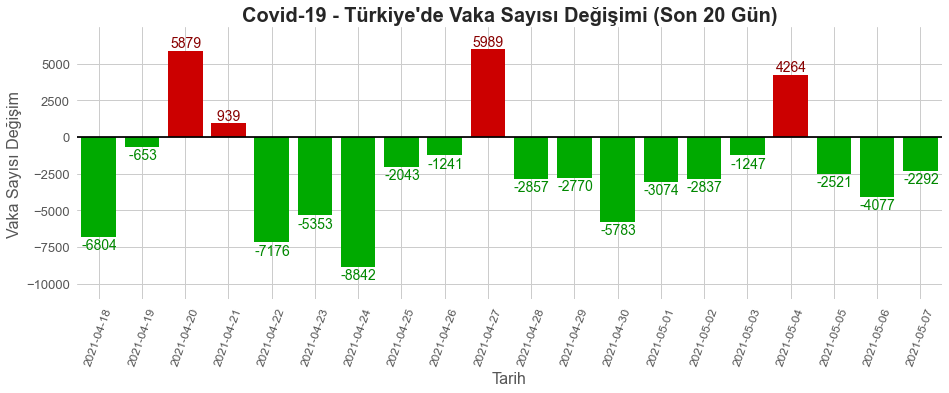

In [22]:
vaka_degisim = covid19TR['Vaka +/-'][-20:]
plt.figure(figsize=(15.5,5))
barc = []
for i in range(len(covid19TR)-20,len(covid19TR)):
    if covid19TR.iloc[i,17] >= 0:
        barc.append('#cc0000')
    else:   barc.append('#00aa00')
plt.bar(covid19TR.index[-20:], vaka_degisim, color=barc)
plt.axis([-0.5,19.5,min(vaka_degisim)*1.25,max(vaka_degisim)*1.25])
plt.xticks(covid19TR.index[-20:], rotation=70, fontsize=12, color='#555555')
plt.yticks(color='#555555', fontsize=13)
for i in range(len(covid19TR)-20,len(covid19TR)):
    if covid19TR.iloc[i,17] >= 0:
        plt.text(i-(len(covid19TR)-19.65), covid19TR.iloc[i,17]+240, 
                 "{:4}".format(int(covid19TR.iloc[i,17])), fontsize=14, color='#880000')
    else:
        plt.text(i-(len(covid19TR)-19.6), covid19TR.iloc[i,17]-850, 
                 "{:5}".format(int(covid19TR.iloc[i,17])), fontsize=14, color='#008800')
plt.axhline(0, color='black')
plt.title('Covid-19 - Türkiye\'de Vaka Sayısı Değişimi (Son 20 Gün)', fontsize=20, fontweight='bold')
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Vaka Sayısı Değişim', fontsize=16, color='#555555')
plt.grid(color='#cccccc')
plt.show()

Son 20 günün vaka sayısı değişimi incelendiğinde, en çok **5989** artış (27 Nisan 2021), ve en çok **8842** azalış (24 Nisan 2021) meydana gelmiştir. Bu değişimlerin sadece **dört farklı günde** artış ile sonuçlanması ve keza **çoğunlukla aşağı yönde** olması _aktif vaka sayısının_ düşmesinde önemli bir başka unsurdur!

### **Son 20 Günün Vefat Sayısı Değişim Grafiği**

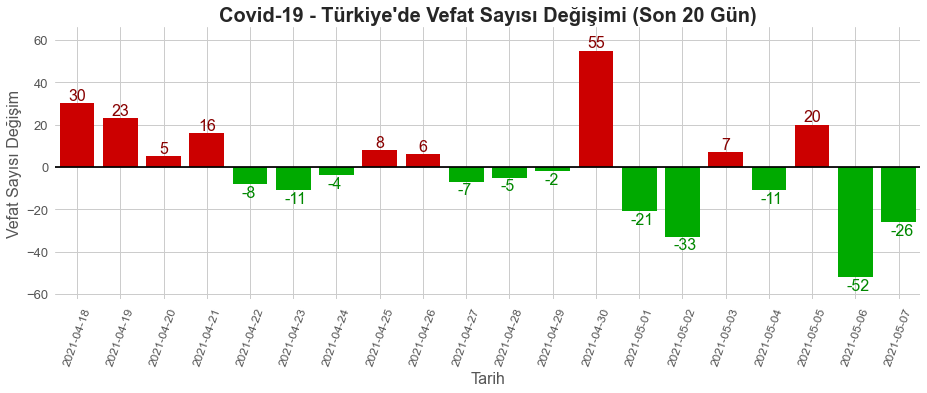

In [23]:
vefat_degisim = covid19TR['Vefat +/-'][-20:]
plt.figure(figsize=(15.5,5))
barc = []
for i in range(len(covid19TR)-20,len(covid19TR)):
    if covid19TR.iloc[i,15] >= 0:
        barc.append('#cc0000')
    else:   barc.append('#00aa00')
plt.bar(covid19TR.index[-20:], vefat_degisim, color=barc)
plt.xticks(covid19TR.index[-20:], rotation=70, fontsize=12, color='#555555')
plt.yticks(color='#555555', fontsize=13)
plt.axis([-0.5, 19.5, min(vefat_degisim)*1.2, max(vefat_degisim)*1.2])
for i in range(len(covid19TR)-20,len(covid19TR)):
    if covid19TR.iloc[i,15] >= 10:    sh = 19.8;   vsh = 1.5;   c = '#880000'
    elif covid19TR.iloc[i,15] >= 0:   sh = 19.9;   vsh = 1.5;   c = '#880000'
    else:    sh = 19.8;    vsh = -6;   c = '#008800'
    plt.text(i-(len(covid19TR)-sh), covid19TR.iloc[i,15]+vsh, int(covid19TR.iloc[i,15]), fontsize=16, color=c)
plt.axhline(0, color='black')
plt.title('Covid-19 - Türkiye\'de Vefat Sayısı Değişimi (Son 20 Gün)', fontsize=20, fontweight='bold')
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Vefat Sayısı Değişim', fontsize=16, color='#555555')
plt.grid(color='#cccccc')
plt.show()

Yukarıdaki grafiğe göre vefat sayısı, son 20 gün içinde, önceki güne kıyasla en fazla **55** yükselmiş (30 Nisan 2021) ve en fazla **52** azalmıştır (6 Mayıs 2021). Mayıs ayı ile birlikte **azalışların daha fazla** olması ilerisi için umut verici bir durumdur!

### **Son 20 Günün İyileşen Sayısı Değişim Grafiği**

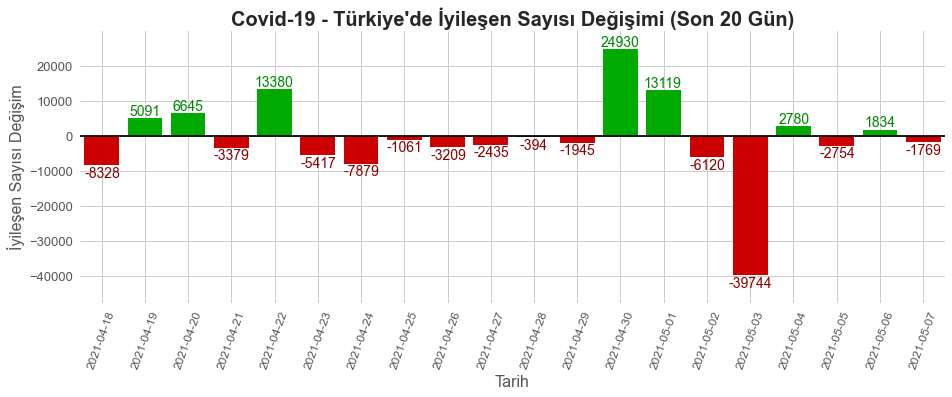

In [24]:
iyilesen_degisim = covid19TR['İyileşen +/-'][-20:]
index = covid19TR['İyileşen +/-'][-20:].index
plt.figure(figsize=(15.5,5))
barc = []
for i in range(20):
    if iyilesen_degisim[i] >= 0:
        barc.append('#00aa00')
    else:   barc.append('#cc0000')
plt.bar(index, iyilesen_degisim, color=barc)
plt.xticks(index, rotation=70, fontsize=12, color='#555555')
plt.yticks(color='#555555', fontsize=13)
plt.axis([-0.5, 19.5, min(iyilesen_degisim)*1.2, max(iyilesen_degisim)*1.2])
for i in range(20):
    if iyilesen_degisim[i] >= 0:
        if int(iyilesen_degisim[i]) >= 10000:    sh = 0.46
        elif int(iyilesen_degisim[i]) >= 1000:   sh = 0.35
        elif int(iyilesen_degisim[i]) >= 100:    sh = 0.25
        else:    sh = 0.18
        plt.text(i-sh, iyilesen_degisim[i]+700, int(iyilesen_degisim[i]), fontsize=14, color='#008800')
    else:
        if int(iyilesen_degisim[i]) <= -10000:    sh = 0.5
        elif int(iyilesen_degisim[i]) <= -1000:   sh = 0.4
        elif int(iyilesen_degisim[i]) <= -100:    sh = 0.33
        else:    sh = 0.25
        plt.text(i-sh, iyilesen_degisim[i]-3500, int(iyilesen_degisim[i]), fontsize=14, color='#880000')
plt.axhline(0, color='black')
plt.title('Covid-19 - Türkiye\'de İyileşen Sayısı Değişimi (Son 20 Gün)', fontsize=20, fontweight='bold')
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('İyileşen Sayısı Değişim', fontsize=16, color='#555555')
plt.grid(color='#cccccc')
plt.show()

Son 20 günün iyileşen hasta sayısı değişiminde, en fazla artış **30 Nisan 2021**'de **24930** ile gerçekleşirken; en fazla düşüş **39744** ile **3 Mayıs 2021**'de görülmüştür. 

Grafikte iyileşen sayısının eksi (-) yöndeki değişimin, artı (+) yöne göre **daha fazla** olduğu söylenebilir.

### **Toplam Aktif Vaka Sayıları (Son 20 Gün)**

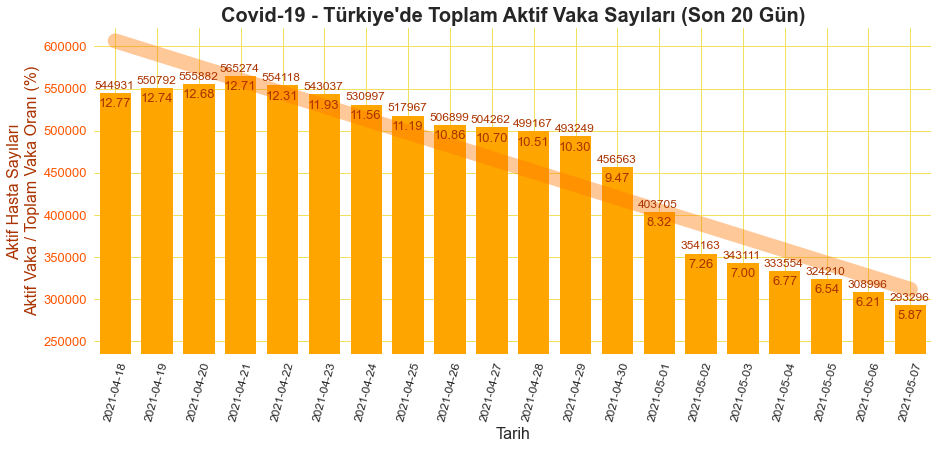

In [25]:
covid19TR['Toplam Aktif Vaka'] = covid19TR['Toplam Vaka'] - covid19TR['Toplam Vefat'] - covid19TR['Toplam İyileşen']
slp, intcp = np.polyfit(list(range(20)), covid19TR['Toplam Aktif Vaka'][-20:], 1)
plt.figure(figsize=(15,6))
plt.bar(covid19TR.index[-20:], covid19TR['Toplam Aktif Vaka'][-20:], color='orange', width=0.75)
plt.axis([-0.5,19.5,covid19TR['Toplam Aktif Vaka'][-20:].min()*0.8,covid19TR['Toplam Aktif Vaka'][-20:].max()*1.1])
for i in range(len(covid19TR)-20,len(covid19TR)):
    plt.text(i-(len(covid19TR)-19.5), covid19TR.iloc[i,19]+5000, "{:6}".format(int(covid19TR.iloc[i,19])),
             fontsize=12, color='#aa3300')
    if covid19TR.iloc[i,19]/covid19TR.iloc[i,9]*100 >= 10:    sh = 19.6
    else:    sh = 19.7
    plt.text(i-(len(covid19TR)-sh), covid19TR.iloc[i,19]-17000, 
             "{:3.2f}".format(round(covid19TR.iloc[i,19]/covid19TR.iloc[i,9]*100, 2)), fontsize=13, color='#aa3300')
plt.plot([0,19],[intcp,intcp+(slp*19)], linewidth=15, alpha=0.4, color='#ff7700')
plt.xticks(rotation=75, fontsize=12)
plt.yticks(fontsize=13, color='#ff5500')
plt.title('Covid-19 - Türkiye\'de Toplam Aktif Vaka Sayıları (Son 20 Gün)', fontsize=20, fontweight='bold')
plt.xlabel('Tarih', fontsize=16)
plt.ylabel('Aktif Hasta Sayıları\nAktif Vaka / Toplam Vaka Oranı (%)', fontsize=16, color='#aa3300')
plt.grid(color='#f3e05d')
plt.show()

Son 20 günün toplam aktif vaka sayılarına baktığımızda en yüksek 27 Mart 2021'de **565274** olarak ölçülmüş olup, bu tarihten sonra **her geçen gün düşüşler** kaydedilmiştir! 

Özellikle bu düşüş, 30 Nisan 2021'den sonra **giderek hızlanmış**, 3 Mayıs 2021'de **yavaşlamış** ve sonrasında **neredeyse sabit** şekilde düşüşüne devam etmiştir.

Toplam vaka sayısına göre oranlar ise önceleri **%10'un üzerinde** seyrederken, son günlerde bu oran giderek düşüşünü sürdürerek en son 7 Mayıs 2021'de **%5.87** olarak gerçekleşmiştir.

### Son 4 Hafta için Hastalarda Zatürre Oranları ve Ağır Hasta Sayıları

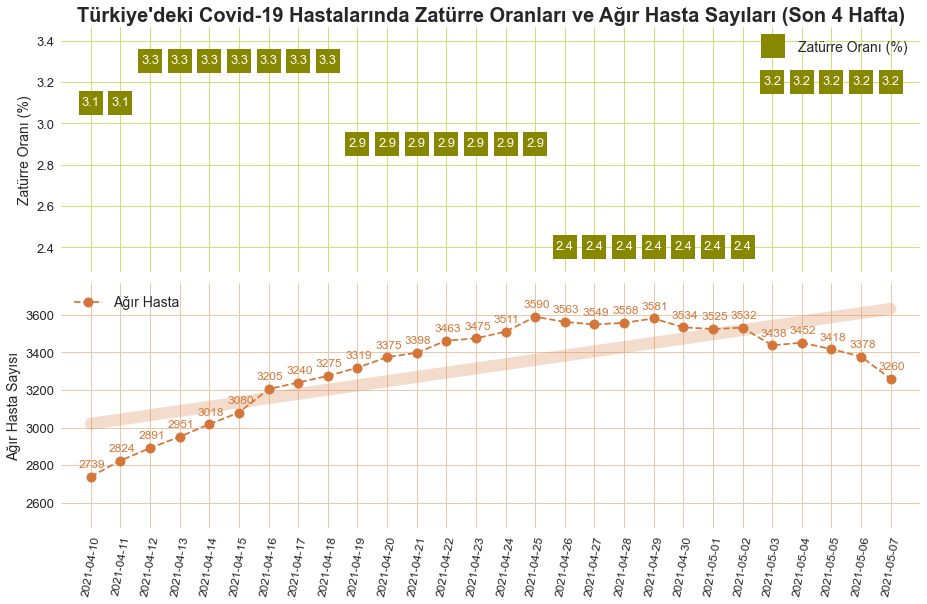

In [26]:
plt.figure(figsize=(13.5,8.5))
lm = len(covid19TR)-28
plt.subplot(2,1,1)
plt.plot(covid19TR.index[lm:], covid19TR.iloc[lm:,6], linestyle=' ', marker='s', markersize=24,
         label='Zatürre Oranı (%)', color='#888800')
for i in range(lm, len(covid19TR)):
    plt.text(i-lm-0.3, covid19TR.iloc[i,6]-0.01, covid19TR.iloc[i,6], fontsize=13, color='white')
plt.axis([-1, len(covid19TR.index[lm:]), covid19TR.iloc[lm:,6].min()*0.95, covid19TR.iloc[lm:,6].max()*1.05])
plt.title('Türkiye\'deki Covid-19 Hastalarında Zatürre Oranları ve Ağır Hasta Sayıları (Son 4 Hafta)', 
          fontsize=20, fontweight='bold')
plt.ylabel('Zatürre Oranı (%)', fontsize=14)
plt.xticks(covid19TR.index[lm:], ['' for _ in range(len(covid19TR.index[lm:]))])
plt.yticks(fontsize=13)
plt.grid(color='#d1df77')
plt.legend(loc='upper right', fontsize=14)
         
plt.subplot(2,1,2)
slp, intcp = np.polyfit(list(range(28)), covid19TR['Ağır Hasta'][-28:], 1)
plt.plot(covid19TR.index[lm:], covid19TR.iloc[lm:,7], linestyle='--', marker='o', markersize=10,
         label='Ağır Hasta', color='#d4763a')
plt.plot([0, 27],[intcp, intcp+(slp*27)], color='#d4763a', alpha=0.25, linewidth=12)
for i in range(lm,len(covid19TR)):
    plt.text(i-lm-0.4, covid19TR.iloc[i,7]+50, int(covid19TR.iloc[i,7]), fontsize=12, color='#d4763a')
plt.axis([-1, len(covid19TR.index[lm:]), covid19TR.iloc[lm:,7].min()*0.9, covid19TR.iloc[lm:,7].max()*1.05])
plt.ylabel('Ağır Hasta Sayısı', fontsize=14)
plt.xticks(rotation=80, fontsize=12)
plt.yticks(fontsize=13)
plt.grid(color='#edc8a8')
plt.legend(loc='upper left', fontsize=14)
plt.tight_layout()
plt.show()

**Son 4 hafta için hastalardaki zatürre oranları ve ağır hasta sayıları için;**

_Hastalarda Zatürre Oranı,_ sırayla **%3.1**, **%3.3**, **%2.9**, **%2.4** ve son olarak **%3.2** şeklinde ölçülmüştür.

**Not:** Bu oranların _haftalık_ bazda verildiği ve ilgili günlerde dolayısıyla aynı olarak kaldığı dikkate alınmalıdır.

_Ağir Hasta Sayısı,_ 25 Nisan 2021'e kadar **yükselme eğiliminde** olup **3590**'a kadar yükselmiş, sonrasında **3500**'ün üzerinde sayılar gözlemlenmiş ve 3 Mayıs 2021'den sonra **belirgin düşüşler** yaşanarak en son 7 Mayıs 2021'de **3260**'a kadar gerilemiştir.

### Hasta, Vefat, İyileşen, Test ve Vaka Artışlarının Aylık Toplamları

In [27]:
analiz_sutunlar = ['Hasta Artış', 'Vefat Artış', 'İyileşen Artış', 'Test Artış', 'Günlük Vaka',
                   'Hasta +/-', 'Vefat +/-', 'İyileşen +/-', 'Test +/-', 'Vaka +/-']
covid19TR = covid19TR.reset_index()
covid19TR['Tarih'] = pd.to_datetime(covid19TR['Tarih'])
covid19TR_aylik_toplam = covid19TR.resample('M', on='Tarih')[analiz_sutunlar[:5]].sum()
covid19TR_aylik_toplam.columns = ['Toplam Hasta', 'Toplam Vefat', 'Toplam İyileşen', 'Toplam Test', 'Toplam Vaka']
covid19TR_aylik_toplam

,Toplam Hasta,Toplam Vefat,Toplam İyileşen,Toplam Test,Toplam Vaka
Tarih,,,,,
2020-03-31,13530,214,243,92403,0
2020-04-30,106673,2960,48643,941214,0
2020-05-31,43738,1366,79087,1005577,0
2020-06-30,35964,591,45138,1342456,0
2020-07-31,30967,560,41424,1419173,0
2020-08-31,39260,679,30391,2337669,0
2020-09-30,48530,1825,34823,3241769,0
2020-10-31,56704,2057,44222,3621553,0
2020-11-30,125498,3494,80756,4590478,177931


### Aynı Sütunların ve Değişimlerinin Aylık Ortalamaları

In [28]:
covid19TR_aylik_ortalama = covid19TR.resample('M', on='Tarih')[analiz_sutunlar].mean().fillna(0)
round(covid19TR_aylik_ortalama, 2)

,Hasta Artış,Vefat Artış,İyileşen Artış,Test Artış,Günlük Vaka,Hasta +/-,Vefat +/-,İyileşen +/-,Test +/-,Vaka +/-
Tarih,,,,,,,,,,
2020-03-31,644.29,10.19,11.57,4400.14,0.00,128.76,2.19,3.86,734.38,0.00
2020-04-30,3555.77,98.67,1621.43,31373.80,0.00,-2.97,1.57,159.43,886.07,0.00
2020-05-31,1410.90,44.06,2551.19,32437.97,0.00,-57.29,-2.19,-125.00,-206.58,0.00
2020-06-30,1198.80,19.70,1504.60,44748.53,0.00,15.13,-0.30,10.43,496.40,0.00
2020-07-31,998.94,18.06,1336.26,45779.77,0.00,-10.03,0.03,-9.87,-129.03,0.00
2020-08-31,1266.45,21.90,980.35,75408.68,0.00,19.52,0.87,2.94,2051.94,0.00
2020-09-30,1617.67,60.83,1160.77,108058.97,0.00,-6.53,0.70,5.27,66.53,0.00
2020-10-31,1829.16,66.35,1426.52,116824.29,0.00,26.52,0.32,8.42,387.45,0.00
2020-11-30,4183.27,116.47,2691.87,153015.93,5931.03,143.37,3.77,99.30,1751.57,1040.63


### Sonuç olarak;

**Yukarıdaki analizlerde tüm bu rakamlar ve görseller şunu işaret ediyor ki Türkiye'de bir yıldan fazla süren Koronavirüs riskinin TAM KAPANMA ile azalma eğilimi gösterdiği ve böyle giderse yeniden NORMALLEŞMENİN olacağı söylenebilir! Tedbirlere ve sokak kısıtlamalarına uyulmadığı müddetçe önceki aylardaki durumdan DAHA KÖTÜSÜNE gitmemizin KAÇINILMAZ olacağı da aşikardır!**

**Virüsün yayılmasına engel olmak için asla ve asla virüs yokmuş gibi davranmamaya; kendimizi, sevdiklerimizi ve etrafımızdaki insanları önemseyerek önlemlerimizi alarak kontrollü yaşamaya devam edelim. Zorunlu kalmadıkça dışarı çıkmamaya; eğer dışarıdaysak maske takmaya (gerekirse çift maske), dezenfaktan kullanmaya, kalabalık ortamlarda fazla kalmamaya ve açık/kapalı alanlarda sosyal mesafeyi korumaya LÜTFEN özen gösterelim! Tabi, güvenilir kaynaklardan en son haberleri edinmeye; hafta içi her akşam ve hafta sonu kısıtlamalarına mutlaka riayet edelim!**

## Koronavirüsü tamamen yendiğimiz günlerde buluşmak dileğiyle...